## CONUS Correlations between precipitation and vorticity

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
import Ngl
import Nio
import fiona

### Precipitation data

In [2]:
DS=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/resampled/all_merra_precip_6hourly_7-12.nc')
print(DS)
precip=DS.PRECTOTCORR
print(precip)
ts_1=DS.time
data_lat=DS.lat.values
data_lon=DS.lon.values
nlats=len(data_lat)
nlons=len(data_lon)

<xarray.Dataset>
Dimensions:      (lat: 55, lon: 107, time: 60996)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon          (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat          (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 ...
<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
[358961460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0


### Calculate anomalies for precipitation to remove the annual cycle

In [33]:
ds_hourly_climo=precip.groupby('time.hour').mean()
ds_hourly_climo

<xarray.DataArray 'PRECTOTCORR' (hour: 4, lat: 55, lon: 107)>
array([[[3.9795050e-05, 3.8484650e-05, 3.7942067e-05, ...,
         1.3537599e-04, 1.3124416e-04, 1.3087082e-04],
        [3.6359230e-05, 3.5025030e-05, 3.4474182e-05, ...,
         1.3392180e-04, 1.3100538e-04, 1.2979817e-04],
        [3.4608649e-05, 3.2463307e-05, 3.1470212e-05, ...,
         1.3420907e-04, 1.3190748e-04, 1.3036850e-04],
        ...,
        [3.7398512e-04, 3.5820308e-04, 3.6500496e-04, ...,
         2.2119933e-04, 2.4599765e-04, 2.6363833e-04],
        [4.0675362e-04, 3.9957502e-04, 3.6258946e-04, ...,
         2.0922511e-04, 2.4146881e-04, 2.5485954e-04],
        [3.8884566e-04, 3.0997457e-04, 2.2418180e-04, ...,
         2.1030720e-04, 2.2861107e-04, 2.2599226e-04]],

       [[4.7179619e-05, 4.5289125e-05, 4.5042932e-05, ...,
         1.4302644e-04, 1.3817278e-04, 1.3760832e-04],
        [4.3552776e-05, 4.1802396e-05, 4.1046660e-05, ...,
         1.4117488e-04, 1.3747627e-04, 1.3691151e-04],
        [4.1301671e-05, 3.9353774e-05, 3.8301256e-05, ...,
         1.4080407e-04, 1.3654244e-04, 1.3543289e-04],
...
        [4.0889651e-04, 3.9902699e-04, 4.0166991e-04, ...,
         2.2228608e-04, 2.4156510e-04, 2.5668673e-04],
        [4.3228266e-04, 4.1849236e-04, 3.7797313e-04, ...,
         2.1486152e-04, 2.4170404e-04, 2.5420359e-04],
        [4.0966182e-04, 3.0848256e-04, 2.2691741e-04, ...,
         2.2139565e-04, 2.3850609e-04, 2.3492519e-04]],

       [[3.9053313e-05, 3.6307989e-05, 3.5692203e-05, ...,
         1.4294572e-04, 1.3444740e-04, 1.3390004e-04],
        [3.5152105e-05, 3.2972937e-05, 3.2398024e-05, ...,
         1.4463253e-04, 1.3745684e-04, 1.3591646e-04],
        [3.2422922e-05, 3.0411886e-05, 2.9981098e-05, ...,
         1.4629644e-04, 1.4076266e-04, 1.3813849e-04],
        ...,
        [3.9735175e-04, 3.8589010e-04, 4.0922884e-04, ...,
         2.0862182e-04, 2.3208382e-04, 2.4960068e-04],
        [4.4593122e-04, 4.5292973e-04, 4.2374735e-04, ...,
         1.9709251e-04, 2.2877617e-04, 2.4344363e-04],
        [4.5023925e-04, 3.7240045e-04, 2.6923165e-04, ...,
         2.0129568e-04, 2.2031678e-04, 2.1975291e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * hour     (hour) int64 0 6 12 18

In [34]:
ds_anoms_hourly=precip.groupby('time.hour')-ds_hourly_climo
ds_anoms_hourly


<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[-3.97950498e-05, -3.84846498e-05, -3.79420671e-05, ...,
         -7.71496998e-05, -1.09201268e-04, -1.12444606e-04],
        [-3.63592299e-05, -3.50250302e-05, -3.44741820e-05, ...,
         -4.50512744e-05, -1.00733785e-04, -9.32784460e-05],
        [-3.46086490e-05, -3.24633074e-05, -3.14702120e-05, ...,
         -3.35666264e-05, -5.81783970e-05, -8.75898259e-05],
        ...,
        [-2.62312096e-04, -1.22019672e-04,  3.46257264e-04, ...,
         -2.18459609e-04, -2.45266943e-04, -2.62307061e-04],
        [-2.93221092e-05,  2.06052879e-04,  6.22109044e-04, ...,
         -2.08962767e-04, -2.41242567e-04, -2.54553626e-04],
        [ 5.55649516e-04,  2.67981872e-04,  1.48436637e-04, ...,
         -2.09912410e-04, -2.27785407e-04, -2.24201562e-04]],

       [[-4.71796193e-05, -4.52891254e-05, -4.50429325e-05, ...,
          1.23293430e-05, -1.94086606e-05, -3.21528059e-05],
        [-4.35527763e-05, -4.18023956e-05, -4.10466600e-05, ...,
          2.60198722e-05, -3.09907045e-05, -3.09623865e-05],
        [-4.13016714e-05, -3.93537739e-05, -3.83012557e-05, ...,
          4.75354318e-05,  6.71177986e-07, -2.89324234e-05],
...
          4.71858121e-03,  4.15570801e-03,  3.35440109e-03],
        [-1.91248924e-04, -1.42835779e-04, -4.81210300e-05, ...,
          4.89683263e-03,  4.20432584e-03,  3.75265907e-03],
        [ 9.90340195e-05,  5.68194082e-05, -6.99262309e-05, ...,
          4.20412980e-03,  3.72830220e-03,  3.32585629e-03]],

       [[-2.59929111e-05, -2.93885532e-05, -2.96856379e-05, ...,
          2.38315878e-03,  7.52308033e-03,  8.57910700e-03],
        [-3.04645255e-05, -2.85720889e-05, -2.77561958e-05, ...,
          7.05680065e-03,  9.98126622e-03,  9.69598908e-03],
        [-2.98791310e-05, -2.64365353e-05, -2.49426430e-05, ...,
          9.39533394e-03,  1.13152498e-02,  1.38675226e-02],
        ...,
        [-2.81159941e-04, -2.54171289e-04, -2.10238737e-04, ...,
          1.62968441e-04,  2.13017585e-04,  8.53383273e-04],
        [-2.75029801e-04, -1.95176894e-04, -3.10246833e-06, ...,
          1.21342158e-03,  1.43496832e-03,  2.43355008e-03],
        [-7.90066260e-05,  7.45598809e-05, -1.08678651e-05, ...,
          1.87839975e-03,  2.32605333e-03,  3.44056822e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [39]:
ds_annual_climo=precip.groupby('time.year').mean()
ds_annual_climo

<xarray.DataArray 'PRECTOTCORR' (year: 42, lat: 55, lon: 107)>
array([[[3.79937483e-05, 3.69177505e-05, 3.68168803e-05, ...,
         1.71561012e-04, 1.55118367e-04, 1.50792359e-04],
        [3.34639117e-05, 3.29502582e-05, 3.36215198e-05, ...,
         1.80330986e-04, 1.70301631e-04, 1.62184733e-04],
        [3.11351650e-05, 3.00062929e-05, 3.10803916e-05, ...,
         1.85657409e-04, 1.81759329e-04, 1.72807180e-04],
        ...,
        [3.63402389e-04, 3.74292373e-04, 4.42269520e-04, ...,
         2.42222901e-04, 2.47285061e-04, 2.54506245e-04],
        [3.58865684e-04, 3.68363922e-04, 4.02684993e-04, ...,
         2.38668435e-04, 2.48023454e-04, 2.57633452e-04],
        [3.45317152e-04, 2.73705897e-04, 2.35730709e-04, ...,
         2.34222680e-04, 2.34347463e-04, 2.36894848e-04]],

       [[3.99437886e-05, 3.06000293e-05, 2.59030385e-05, ...,
         2.18896283e-04, 2.21379421e-04, 2.19738926e-04],
        [3.00198462e-05, 2.70860328e-05, 2.38722514e-05, ...,
         2.22871735e-04, 2.21682407e-04, 2.22120798e-04],
        [2.53997532e-05, 2.52486734e-05, 2.35403040e-05, ...,
         2.24390897e-04, 2.21580354e-04, 2.19047535e-04],
...
        [2.99217994e-04, 3.11733049e-04, 3.43595282e-04, ...,
         1.84306904e-04, 1.87545971e-04, 1.91469924e-04],
        [3.85358406e-04, 3.86077823e-04, 3.35804827e-04, ...,
         1.68879327e-04, 1.83395794e-04, 1.88151229e-04],
        [4.07435116e-04, 2.68260017e-04, 1.86190460e-04, ...,
         1.82023083e-04, 1.99694550e-04, 1.96800611e-04]],

       [[3.67706634e-05, 3.37125712e-05, 3.39465223e-05, ...,
         9.66809021e-05, 1.01509089e-04, 1.04839601e-04],
        [3.26809459e-05, 3.01072614e-05, 2.94957972e-05, ...,
         1.06926964e-04, 1.06912026e-04, 1.10662600e-04],
        [3.01129512e-05, 2.64028149e-05, 2.68488948e-05, ...,
         1.10845365e-04, 1.11495880e-04, 1.15828116e-04],
        ...,
        [1.79550800e-04, 1.82091535e-04, 2.10138081e-04, ...,
         2.31578349e-04, 2.32347229e-04, 2.37453496e-04],
        [2.40090245e-04, 2.29944810e-04, 2.08093945e-04, ...,
         2.31177182e-04, 2.45140924e-04, 2.57296138e-04],
        [2.73399957e-04, 1.76330985e-04, 1.17568525e-04, ...,
         2.37146771e-04, 2.59920140e-04, 2.67342315e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020 2021

In [40]:
ds_annual_anoms=precip.groupby('time.year')-ds_annual_climo
ds_annual_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[-3.79937483e-05, -3.69177505e-05, -3.68168803e-05, ...,
         -1.13334725e-04, -1.33075475e-04, -1.32366156e-04],
        [-3.34639117e-05, -3.29502582e-05, -3.36215198e-05, ...,
         -9.14604607e-05, -1.40030039e-04, -1.25665014e-04],
        [-3.11351650e-05, -3.00062929e-05, -3.10803916e-05, ...,
         -8.50149663e-05, -1.08030246e-04, -1.30028508e-04],
        ...,
        [-2.51729361e-04, -1.38108968e-04,  2.68992706e-04, ...,
         -2.39483183e-04, -2.46554380e-04, -2.53174978e-04],
        [ 1.85658282e-05,  2.37263972e-04,  5.82013512e-04, ...,
         -2.38406094e-04, -2.47797230e-04, -2.57327571e-04],
        [ 5.99178020e-04,  3.04250541e-04,  1.36887727e-04, ...,
         -2.33827886e-04, -2.33521801e-04, -2.35104148e-04]],

       [[-3.79937483e-05, -3.69177505e-05, -3.68168803e-05, ...,
         -1.62052311e-05, -3.63542495e-05, -4.53368411e-05],
        [-3.34639117e-05, -3.29502582e-05, -3.36215198e-05, ...,
         -1.31362322e-05, -6.38160709e-05, -5.62356145e-05],
        [-3.11351650e-05, -3.00062929e-05, -3.10803916e-05, ...,
          2.68209260e-06, -4.45457117e-05, -6.63067185e-05],
...
          4.70928894e-03,  4.16492578e-03,  3.37363430e-03],
        [ 9.43487976e-07,  4.57117712e-05,  1.21758159e-04, ...,
          4.88051726e-03,  4.20088880e-03,  3.74956662e-03],
        [ 2.35295884e-04,  1.88970982e-04,  3.94226590e-05, ...,
          4.18837881e-03,  3.70688830e-03,  3.29343928e-03]],

       [[-2.37102613e-05, -2.67931355e-05, -2.79399574e-05, ...,
          2.42942362e-03,  7.55601889e-03,  8.60816706e-03],
        [-2.79933665e-05, -2.57064130e-05, -2.48539691e-05, ...,
          7.09450617e-03,  1.00118108e-02,  9.72124282e-03],
        [-2.75691600e-05, -2.24274645e-05, -2.18104396e-05, ...,
          9.43078566e-03,  1.13445166e-02,  1.38898334e-02],
        ...,
        [-6.33589952e-05, -5.03727206e-05, -1.11479749e-05, ...,
          1.40011907e-04,  2.12754181e-04,  8.65530455e-04],
        [-6.91888272e-05,  2.78080261e-05,  2.12550935e-04, ...,
          1.17933692e-03,  1.41860358e-03,  2.41969759e-03],
        [ 9.78326716e-05,  2.70629360e-04,  1.40795251e-04, ...,
          1.84254872e-03,  2.28645001e-03,  3.39297904e-03]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
    year     (time) int64 1980 1980 1980 1980 1980 ... 2021 2021 2021 2021 2021

In [3]:
for m in range(len(precip)):
    precip_new=precip[m,:,:]
print(precip_new)
print(np.shape(precip_new))
        

<xarray.DataArray 'PRECTOTCORR' (lat: 55, lon: 107)>
array([[1.306040e-05, 6.919436e-06, 6.006565e-06, ..., 2.526104e-03,
        7.657528e-03, 8.713007e-03],
       [4.687579e-06, 4.400848e-06, 4.641828e-06, ..., 7.201433e-03,
        1.011872e-02, 9.831905e-03],
       [2.543791e-06, 3.975350e-06, 5.038455e-06, ..., 9.541631e-03,
        1.145601e-02, 1.400566e-02],
       ...,
       [1.161918e-04, 1.317188e-04, 1.989901e-04, ..., 3.715903e-04,
        4.451014e-04, 1.102984e-03],
       [1.709014e-04, 2.577528e-04, 4.206449e-04, ..., 1.410514e-03,
        1.663744e-03, 2.676994e-03],
       [3.712326e-04, 4.469603e-04, 2.583638e-04, ..., 2.079695e-03,
        2.546370e-03, 3.660321e-03]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
(55, 107)


### Vorticity data

In [4]:
u_winds=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/winds_computed/u_computed.nc')
v_winds=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/winds_computed/v_computed.nc')
u_850=u_winds.U
v_850=v_winds.V
### Try to load all the files
lat=u_winds['lat']
lon=u_winds['lon']
nlats=len(lat)
nlons=len(lon)
print(nlats)
print(nlons)
ts_1=u_winds['time']
ts_1

55
113


<xarray.DataArray 'time' (time: 61844)>
array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', ..., '2022-04-30T06:00:00.000000000',
       '2022-04-30T12:00:00.000000000', '2022-04-30T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-04-30T18:00:00
    lev      float64 ...
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [5]:
u_correct_time=u_850.sel(time=slice(u_850['time'][0],u_850['time'][-849]))
v_correct_time=v_850.sel(time=slice(v_850['time'][0],v_850['time'][-849]))
print(u_correct_time)
print(v_correct_time)

<xarray.DataArray 'U' (time: 60996, lat: 55, lon: 113)>
[379090140 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 850.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
<xarray.DataArray 'V' (time: 60996, lat: 55, lon: 113)>
[379090140 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...
Attributes:
    standard_name:   nor

In [6]:
for i in range(0,len(u_correct_time)):
    u_length=u_correct_time.values
    v_length=v_correct_time.values
print(np.shape(u_length))
print(np.shape(v_length))


KeyboardInterrupt: 

In [18]:
data_lat_new=lat[:]
data_lon_new=lon[:-3]
print(np.shape(data_lat_new))
print(np.shape(data_lon_new))

(55,)
(110,)


In [42]:
'''
for i in range(1980,2022):
    print(i)
    year_of_data_u = u_850.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    #print(np.nanmax(year_of_data_u))
    print(np.shape(year_of_data_u))
    year_of_data_v = v_850.sel(time=slice(str(i)+"-01-01",str(i)+"-12-31")).values
    #print(np.nanmax(year_of_data_v))
    time_oneyear = ts_1.sortby('time').sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    '''

'\nfor i in range(1980,2022):\n    print(i)\n    year_of_data_u = u_850.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values\n    #print(np.nanmax(year_of_data_u))\n    print(np.shape(year_of_data_u))\n    year_of_data_v = v_850.sel(time=slice(str(i)+"-01-01",str(i)+"-12-31")).values\n    #print(np.nanmax(year_of_data_v))\n    time_oneyear = ts_1.sortby(\'time\').sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values\n    '

In [19]:
vort_list=[]
for m in range(0,len(u_correct_time)):
    vort=mg.hcurl(u_length[m,:,:],v_length[m,:,:],lat,lon)
    vort_list.append(vort)
print(vort_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
vort_time=u_correct_time['time']
vort_time

<xarray.DataArray 'time' (time: 60996)>
array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', ..., '2021-09-30T06:00:00.000000000',
       '2021-09-30T12:00:00.000000000', '2021-09-30T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lev      float64 850.0
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [26]:
vort_array=xr.DataArray(vort_list,coords={'time':vort_time,'lon':lon,'lat':lat},dims=['time','lat','lon'])
vort_array

<xarray.DataArray (time: 60996, lat: 55, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -2.42235842e-05, -1.55352496e-05, ...,
         -7.32452201e-06, -1.26196661e-05,             nan],
        [            nan, -3.15625059e-05, -2.71375479e-05, ...,
         -4.93965553e-06, -8.79992041e-06,             nan],
        ...,
        [            nan,  4.32098065e-05, -8.86352818e-05, ...,
          2.05989107e-05,  5.47349489e-05,             nan],
        [            nan,             nan,             nan, ...,
          3.64924552e-05,  5.39624559e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -1.47396403e-05, -3.98689017e-06, ...,
         -7.15513449e-06, -7.25494480e-06,             nan],
        [            nan, -2.59805951e-05, -2.21906452e-05, ...,
          5.05023919e-06, -6.53649521e-06,             nan],
...
        [            nan,  2.32469384e-06,  4.64112600e-05, ...,
         -3.23834104e-05, -4.51848898e-05,             nan],
        [            nan,             nan,             nan, ...,
          3.18241710e-06, -3.88211606e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.75336074e-05,  2.07199354e-05, ...,
         -3.18599211e-05, -4.68623204e-05,             nan],
        [            nan,  3.16370202e-06,  4.90686627e-06, ...,
         -4.56952419e-05, -4.52358820e-05,             nan],
        ...,
        [            nan,  1.25498037e-05,  3.36257532e-06, ...,
         -3.39916525e-05, -3.85754123e-05,             nan],
        [            nan,             nan,             nan, ...,
         -4.53541903e-05, -8.69337517e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [28]:
vort_array.to_netcdf('/project/xprecip/merra2_ncfiles/winds/vort_computed_corrected_8-16.nc')

### Loading Saved Vorticity Computation

In [7]:
DS=xr.open_dataset('/project/xprecip/merra2_ncfiles/winds/vort_computed_corrected_8-16.nc')
DS
vort=DS['__xarray_dataarray_variable__']
vort


<xarray.DataArray '__xarray_dataarray_variable__' (time: 60996, lat: 55, lon: 113)>
[379090140 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [8]:
vort_time=vort['time']
vort_time

<xarray.DataArray 'time' (time: 60996)>
array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', ..., '2021-09-30T06:00:00.000000000',
       '2021-09-30T12:00:00.000000000', '2021-09-30T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [9]:
data_lat=vort['lat']
data_lon=vort['lon']
nlats=len(data_lat)
nlons=len(data_lon)
print(nlats)
print(nlons)

55
113


In [10]:
print(np.shape(vort))
print(np.nanmin(vort*10000))
print(np.nanmax(vort*10000))

(60996, 55, 113)
-3.8405607183099106
11.323157687167447


In [11]:
vort_dc=vort.sel(lat=39,lon=-77,method='nearest')
vort_dc

<xarray.DataArray '__xarray_dataarray_variable__' (time: 60996)>
array([-1.759577e-05, -1.087733e-05, -2.280392e-05, ..., -3.137788e-05,
        3.844441e-06, -2.093197e-06])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lon      float64 -76.88
    lat      float64 39.0

### Visualization

In [12]:
precip_xarray=xr.DataArray(precip)
precip_xarray

<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.82262874e-05, 2.20428919e-05, 1.84262080e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.88705254e-05, 3.02715925e-05, 3.65197193e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00642443e-04, 7.37290829e-05, 4.27786727e-05],
        ...,
        [1.11673027e-04, 2.36183405e-04, 7.11262226e-04, ...,
         2.73971818e-06, 7.30695319e-07, 1.33126741e-06],
        [3.77431512e-04, 6.05627894e-04, 9.84698534e-04, ...,
         2.62336698e-07, 2.26238626e-07, 3.05895810e-07],
        [9.44495201e-04, 5.77956438e-04, 3.72618437e-04, ...,
         3.94789822e-07, 8.25668394e-07, 1.79070048e-06]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.55355781e-04, 1.18764117e-04, 1.05455518e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.67194754e-04, 1.06485561e-04, 1.05949119e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.88339502e-04, 1.37213618e-04, 1.06500462e-04],
...
        [1.13446265e-04, 1.01394951e-04, 1.55705959e-04, ...,
         4.94086742e-03, 4.39727306e-03, 3.61108780e-03],
        [2.41033733e-04, 2.75656581e-04, 3.29852104e-04, ...,
         5.11169434e-03, 4.44602966e-03, 4.00686264e-03],
        [5.08695841e-04, 3.65301967e-04, 1.56991184e-04, ...,
         4.42552567e-03, 3.96680832e-03, 3.56078148e-03]],

       [[1.30604021e-05, 6.91943569e-06, 6.00656494e-06, ...,
         2.52610445e-03, 7.65752792e-03, 8.71300697e-03],
        [4.68757935e-06, 4.40084841e-06, 4.64182813e-06, ...,
         7.20143318e-03, 1.01187229e-02, 9.83190536e-03],
        [2.54379120e-06, 3.97535041e-06, 5.03845513e-06, ...,
         9.54163074e-03, 1.14560127e-02, 1.40056610e-02],
        ...,
        [1.16191804e-04, 1.31718814e-04, 1.98990107e-04, ...,
         3.71590257e-04, 4.45101410e-04, 1.10298395e-03],
        [1.70901418e-04, 2.57752836e-04, 4.20644879e-04, ...,
         1.41051412e-03, 1.66374445e-03, 2.67699361e-03],
        [3.71232629e-04, 4.46960330e-04, 2.58363783e-04, ...,
         2.07969546e-03, 2.54637003e-03, 3.66032124e-03]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [11]:
corr_map=xr.corr(precip_xarray,vort*10000,dim='time')
print(corr_map)

<xarray.DataArray (lat: 52, lon: 106)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.05216547, 0.04596107, ..., 0.16874037, 0.15985882,
        0.16241868],
       [       nan, 0.05103425, 0.04842138, ..., 0.16257292, 0.18479049,
        0.1815851 ],
       ...,
       [       nan, 0.27723402, 0.20097339, ..., 0.11209648, 0.09170876,
        0.09680923],
       [       nan, 0.20198776, 0.14436505, ..., 0.09162758, 0.07874265,
        0.08075923],
       [       nan, 0.04519988, 0.06429181, ..., 0.07716246, 0.07701763,
        0.08764287]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62


Text(0.5, 1.0, 'Correlation between Vorticity at T and 6 hourly Precipitation Accumulation')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


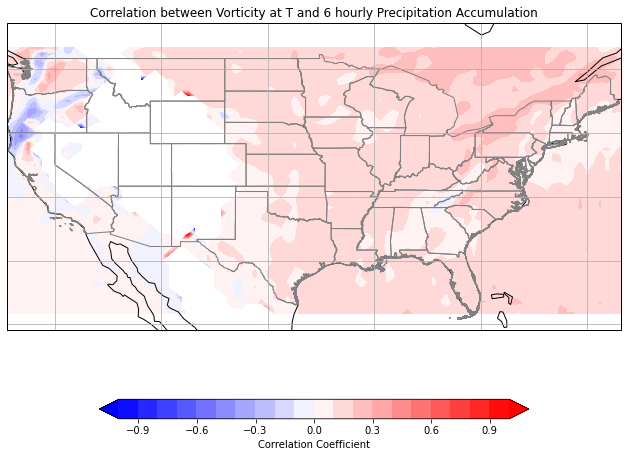

In [12]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map['lon'],corr_map['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Vorticity at T and 6 hourly Precipitation Accumulation')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/conus_vort_winds_10-26-21')

In [13]:
### Washington DC time series correlations
pt_prcp=precip_xarray.sel(lat=39,lon=-77,method='nearest')
pt_vort=vort.sel(lat=39,lon=-77,method='nearest')

### Normalize each variable by standard deviation, for time series plots

In [14]:
prcp_norm=pt_prcp/pt_prcp.std()
vort_norm=pt_vort/pt_vort.std()
prcp_norm
vort_norm

<xarray.DataArray '__xarray_dataarray_variable__' (time: 60996)>
array([-0.48236471, -0.29818754, -0.62513938, ..., -0.86018305,
        0.10539027, -0.05738223])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
    lon      float64 -76.88
    lat      float64 39.0

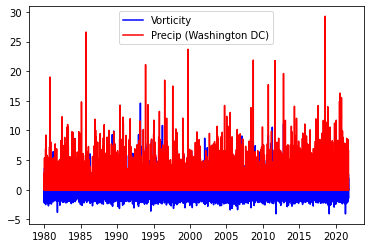

In [15]:
plt.plot(vort_norm['time'],vort_norm,'b')
plt.plot(prcp_norm['time'],prcp_norm,'r')
plt.legend(['Vorticity','Precip (Washington DC)'])

### What happens if voritcity is lagged by T-1?

In [15]:
vort_lagged_list=[]
for m in range(0,len(vort_time)):
    vort_lagged=vort[m-1,:,:]
    vort_lagged_list.append(vort_lagged)
    

In [21]:
vort_lagged_array=xr.DataArray(vort_lagged_list,coords={'time':vort_time,'lon':lon,'lat':lat},dims=['time','lat','lon'])
vort_lagged_array

<xarray.DataArray (time: 60996, lat: 55, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.75336074e-05,  2.07199354e-05, ...,
         -3.18599211e-05, -4.68623204e-05,             nan],
        [            nan,  3.16370202e-06,  4.90686627e-06, ...,
         -4.56952419e-05, -4.52358820e-05,             nan],
        ...,
        [            nan,  1.25498037e-05,  3.36257532e-06, ...,
         -3.39916525e-05, -3.85754123e-05,             nan],
        [            nan,             nan,             nan, ...,
         -4.53541903e-05, -8.69337517e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -2.42235842e-05, -1.55352496e-05, ...,
         -7.32452201e-06, -1.26196661e-05,             nan],
        [            nan, -3.15625059e-05, -2.71375479e-05, ...,
         -4.93965553e-06, -8.79992041e-06,             nan],
...
        [            nan,  1.11573961e-04, -5.98940217e-05, ...,
         -3.18266774e-05, -3.26533393e-05,             nan],
        [            nan,             nan,             nan, ...,
         -2.46764094e-05, -5.07377582e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.53750773e-06,  2.88715860e-06, ...,
         -1.78032669e-05, -2.91704008e-05,             nan],
        [            nan,  1.31578511e-05,  1.79553512e-05, ...,
         -2.67586915e-05, -3.32634689e-05,             nan],
        ...,
        [            nan,  2.32469384e-06,  4.64112600e-05, ...,
         -3.23834104e-05, -4.51848898e-05,             nan],
        [            nan,             nan,             nan, ...,
          3.18241710e-06, -3.88211606e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [24]:
vort_lagged_array[,:,:]

<xarray.DataArray (lat: 55, lon: 113)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,  1.53750773e-06,  2.88715860e-06, ...,
        -1.78032669e-05, -2.91704008e-05,             nan],
       [            nan,  1.31578511e-05,  1.79553512e-05, ...,
        -2.67586915e-05, -3.32634689e-05,             nan],
       ...,
       [            nan,  2.32469384e-06,  4.64112600e-05, ...,
        -3.23834104e-05, -4.51848898e-05,             nan],
       [            nan,             nan,             nan, ...,
         3.18241710e-06, -3.88211606e-05,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
    time     datetime64[ns] 2021-09-30T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [28]:
vort[1,:,:]

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan, -1.473964e-05, -3.986890e-06, ..., -7.155134e-06,
        -7.254945e-06,           nan],
       [          nan, -2.598060e-05, -2.219065e-05, ...,  5.050239e-06,
        -6.536495e-06,           nan],
       ...,
       [          nan, -5.159957e-06, -3.955291e-05, ...,  3.492537e-05,
         5.363575e-05,           nan],
       [          nan,           nan,           nan, ...,  2.329103e-05,
         8.664170e-06,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])
Coordinates:
    time     datetime64[ns] 1980-01-01T06:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5

In [25]:
corr_map_lagged=xr.corr(precip_xarray,vort_lagged_array*10000,dim='time')
print(corr_map_lagged)

<xarray.DataArray (lat: 52, lon: 106)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  0.03248554,  0.02501319, ...,  0.11138736,
         0.11356652,  0.11348472],
       [        nan,  0.02731152,  0.02510088, ...,  0.10307216,
         0.12367365,  0.12081481],
       ...,
       [        nan,  0.1081526 ,  0.06377024, ..., -0.04536692,
        -0.05894353, -0.05877846],
       [        nan,  0.06159987,  0.00698542, ..., -0.05937136,
        -0.06995588, -0.0695296 ],
       [        nan, -0.09204524, -0.06662   , ..., -0.06784609,
        -0.07068784, -0.0663792 ]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62


In [27]:
print(np.nanmax(corr_map_lagged))

1.0


Text(0.5, 1.0, 'Correlation between Vorticity at T-1 and 6 hourly Precipitation Accumulation')

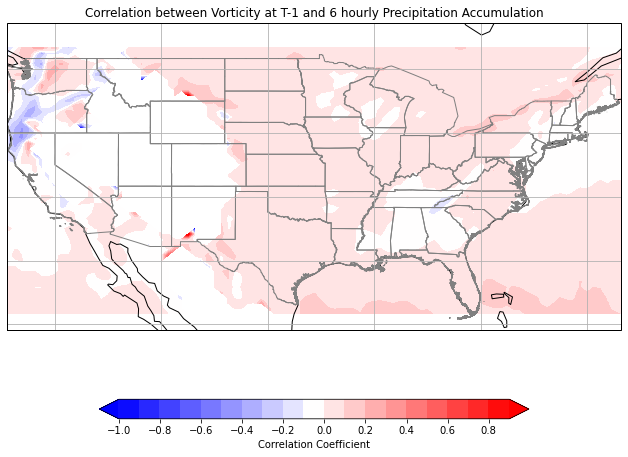

In [30]:
clevs=np.arange(np.nanmin(corr_map_lagged),np.nanmax(corr_map_lagged),0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map_lagged
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map_lagged['lon'],corr_map_lagged['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Vorticity at T-1 and 6 hourly Precipitation Accumulation')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/conus_vort_winds_10-26-21')

### Correlations between precipitation anomalies and vorticity at T-1

In [35]:
corr_map_lagged_anoms=xr.corr(ds_anoms_hourly,vort_lagged_array*10000,dim='time')
print(corr_map_lagged_anoms)

<xarray.DataArray (lat: 52, lon: 106)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  0.03216781,  0.02469337, ...,  0.11143112,
         0.11359505,  0.11350978],
       [        nan,  0.02706287,  0.02480805, ...,  0.10308032,
         0.12367723,  0.12082718],
       ...,
       [        nan,  0.10849749,  0.0635444 , ..., -0.04544881,
        -0.05898915, -0.05883685],
       [        nan,  0.06073552,  0.00575174, ..., -0.05947219,
        -0.06999782, -0.0695816 ],
       [        nan, -0.09371303, -0.06783884, ..., -0.06769901,
        -0.0705509 , -0.06628395]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62


Text(0.5, 1.0, 'Correlation between Vorticity at T-1 and 6 hourly Precipitation Anomalies')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


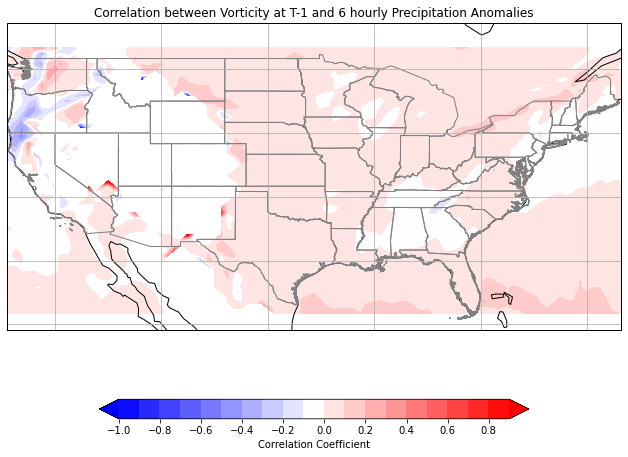

In [36]:
clevs=np.arange(np.nanmin(corr_map_lagged_anoms),np.nanmax(corr_map_lagged_anoms),0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map_lagged_anoms
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map_lagged_anoms['lon'],corr_map_lagged_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Vorticity at T-1 and 6 hourly Precipitation Anomalies')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/conus_vort_winds_10-26-21')

In [41]:
corr_map_lagged_anoms_annual=xr.corr(ds_annual_anoms,vort_lagged_array*10000,dim='time')
print(corr_map_lagged_anoms_annual)

<xarray.DataArray (lat: 52, lon: 106)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  0.03185866,  0.02478954, ...,  0.11022331,
         0.11263317,  0.11242998],
       [        nan,  0.02684187,  0.02481617, ...,  0.10152329,
         0.12232181,  0.1196148 ],
       ...,
       [        nan,  0.10782832,  0.06444217, ..., -0.04606152,
        -0.05960002, -0.05946169],
       [        nan,  0.0623958 ,  0.00672076, ..., -0.05993383,
        -0.07045388, -0.0700137 ],
       [        nan, -0.09225178, -0.06692219, ..., -0.06833093,
        -0.07110047, -0.06668226]])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -61.88 -61.25 -60.62


Text(0.5, 1.0, 'Correlation between Vorticity at T-1 and Annual Precipitation Anomalies')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


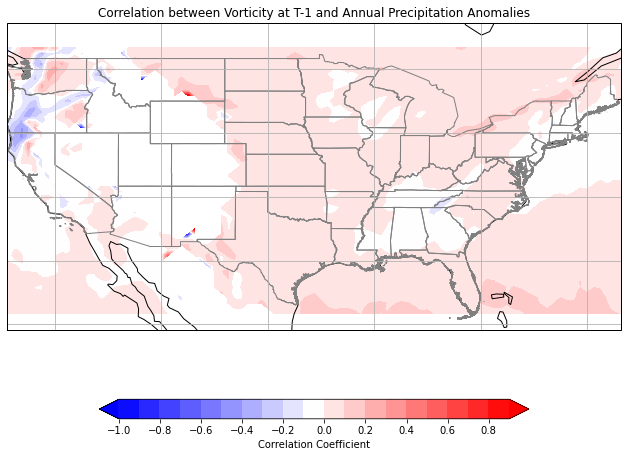

In [42]:
clevs=np.arange(np.nanmin(corr_map_lagged_anoms_annual),np.nanmax(corr_map_lagged_anoms_annual),0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=corr_map_lagged_anoms_annual
#data,lon=add_cyclic_point(r_map,coord=data_lon)

# Make a filled contour plot
cs=ax.contourf(corr_map_lagged_anoms_annual['lon'],corr_map_lagged_anoms_annual['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
ax.set_extent([-124.5,-66.8,23.486,49])
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Vorticity at T-1 and Annual Precipitation Anomalies')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/conus_vort_winds_10-26-21')

### Isolate Vorticity as that associated with ETC (>1)

In [26]:
etc_vort=[]
etc_dates_list=[]
time_array=[]
for i in range(1980,2022):
    time_oneyear = vort_time.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    time_array.append(time_oneyear)
for k in range(0,nlats):
    for j in range(0,nlons):
        vort_of_etc_index=(np.where(vort[k,j]>1.0e-5))
        #etc_dates= time_array[np.squeeze(vort_of_etc_index)]
        #etc_dates_list.append(etc_dates)
'''
            if vort[k,j]>1.0e-5:
                etc_vort.append(vort[k,j])
'''
#print(etc_vort)
#print(etc_dates_list)


IndexError: index 55 is out of bounds for axis 0 with size 55

### Next, Correlations between 95th Percentile Precipitation and Vorticity at T-1 across CONUS

In [52]:
DS=xr.open_dataset('/project/xprecip/merra2_ncfiles/precip/resampled/all_merra_precip_6hourly_7-12.nc')
print(DS)
precip=DS.PRECTOTCORR
print(precip)
ts_1=DS.time
data_lat=DS.lat.values
data_lon=DS.lon.values
nlats=len(data_lat)
nlons=len(data_lon)

<xarray.Dataset>
Dimensions:      (lat: 55, lon: 107, time: 60996)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon          (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat          (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 ...
<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
[358961460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0


In [54]:
percentile_95_list=[]
percentile_dates_list=[]
for i in range(1980,2022,1):
    year_of_data = precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    time_oneyear = ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    sorted_array = np.sort(year_of_data,axis=0)
    percentile_95th = np.nanpercentile(sorted_array, q=95,axis=0)
    percentile_95_list.append(percentile_95th)
    for k in range(0,nlats):
        for j in range(0,nlons):
            i_match = np.asarray((np.where(year_of_data[:,k,j]>=percentile_95th[k,j])))
            percentile_dates = time_oneyear[np.squeeze(i_match)]
            percentile_dates_list.append(percentile_dates)
print(percentile_dates_list)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
print(np.shape(percentile_dates_list))
print(np.shape(percentile_95_list))

(247170,)
(42, 55, 107)


In [66]:
percentile_dates_array=xr.DataArray(percentile_dates_list,coords={'time':percentile_dates_list},dims=['time'])
percentile_dates_array

<xarray.DataArray (time: 247170)>
array([array(['1980-01-05T06:00:00.000000000', '1980-01-05T12:00:00.000000000',
       '1980-01-05T18:00:00.000000000', '1980-01-06T12:00:00.000000000',
       '1980-01-07T06:00:00.000000000', '1980-01-23T12:00:00.000000000',
       '1980-01-24T12:00:00.000000000', '1980-01-30T06:00:00.000000000',
       '1980-02-19T00:00:00.000000000', '1980-02-19T06:00:00.000000000',
       '1980-02-25T00:00:00.000000000', '1980-03-01T06:00:00.000000000',
       '1980-03-01T12:00:00.000000000', '1980-03-12T06:00:00.000000000',
       '1980-03-12T12:00:00.000000000', '1980-03-23T00:00:00.000000000',
       '1980-03-26T18:00:00.000000000', '1980-04-22T00:00:00.000000000',
       '1980-05-24T06:00:00.000000000', '1980-06-12T18:00:00.000000000',
       '1980-06-13T00:00:00.000000000', '1980-07-10T06:00:00.000000000',
       '1980-07-10T12:00:00.000000000', '1980-07-15T06:00:00.000000000',
       '1980-07-15T12:00:00.000000000', '1980-07-15T18:00:00.000000000',
       '1980-07-16T00:00:00.000000000', '1980-07-16T06:00:00.000000000',
       '1980-07-16T12:00:00.000000000', '1980-07-16T18:00:00.000000000',
       '1980-07-17T00:00:00.000000000', '1980-07-17T06:00:00.000000000',
       '1980-07-31T18:00:00.000000000', '1980-08-01T00:00:00.000000000',
       '1980-08-01T06:00:00.000000000', '1980-08-01T12:00:00.000000000',
       '1980-08-02T12:00:00.000000000', '1980-08-24T00:00:00.000000000',
       '1980-08-24T06:00:00.000000000', '1980-08-24T12:00:00.000000000',
...
       '2021-05-09T00:00:00.000000000', '2021-05-09T06:00:00.000000000',
       '2021-05-22T06:00:00.000000000', '2021-05-27T00:00:00.000000000',
       '2021-05-31T12:00:00.000000000', '2021-06-05T18:00:00.000000000',
       '2021-06-16T06:00:00.000000000', '2021-06-23T12:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-07-01T06:00:00.000000000', '2021-07-09T12:00:00.000000000',
       '2021-07-09T18:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-10T06:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-22T18:00:00.000000000', '2021-07-26T18:00:00.000000000',
       '2021-07-31T06:00:00.000000000', '2021-08-24T12:00:00.000000000',
       '2021-08-24T18:00:00.000000000', '2021-08-27T00:00:00.000000000',
       '2021-09-02T18:00:00.000000000', '2021-09-03T00:00:00.000000000',
       '2021-09-03T06:00:00.000000000', '2021-09-07T00:00:00.000000000',
       '2021-09-07T06:00:00.000000000', '2021-09-10T12:00:00.000000000',
       '2021-09-12T18:00:00.000000000', '2021-09-16T00:00:00.000000000',
       '2021-09-25T18:00:00.000000000', '2021-09-26T00:00:00.000000000',
       '2021-09-27T00:00:00.000000000', '2021-09-27T06:00:00.000000000',
       '2021-09-30T06:00:00.000000000', '2021-09-30T12:00:00.000000000',
       '2021-09-30T18:00:00.000000000'], dtype='datetime64[ns]')],
      dtype=object)
Coordinates:
  * time     (time) object ['1980-01-05T06:00:00.000000000' '1980-01-05T12:00...

In [74]:
percentile_95_array=xr.DataArray(percentile_95_list,coords={'time': percentile_dates_array,'lon': data_lon,'lat':data_lat },dims=['time','lon','lat'])

ValueError: conflicting sizes for dimension 'time': length 42 on the data but length 247170 on coordinate 'time'

In [69]:
extreme_prcp_array_time = percentile_dates_array.expand_dims(lat=percentile_95_list['lat'],lon=percentile_95_list['lon'])
print(extreme_prcp_array_time)

TypeError: list indices must be integers or slices, not str

In [24]:
corr_map_lagged=xr.corr(percentile_95th,vort_lagged*10000,dim='time')
print(corr_map_lagged)

TypeError: Only xr.DataArray is supported.Given [<class 'numpy.ndarray'>, <class 'xarray.core.dataarray.DataArray'>].